In [1]:
import warnings
warnings.filterwarnings("ignore")

from graph_tool.all import *
import graph_tool as gt
from numpy.random import randint, random

import pandas as pd
import matplotlib.pyplot
#g = collection.data["polblogs"]
g=graph_tool.load_graph_from_csv("file.csv", directed=False, eprop_types=None,
                        eprop_names=None, hashed=True, 
                        skip_first=False,  ecols=(0,1),
                        csv_options={"delimiter": ",", "quotechar": '"'})

name = g.vp["name"]

In [2]:
#shortest distance
import numpy as np
name = g.vp["name"]
src=15
dest=89
dist = shortest_distance(g, source=g.vertex(src), target=g.vertex(dest))
print(dist)

3


In [3]:
#shortest path


# mapping vertex name with vertex index
name = g.vp["name"]
dict = {}
for i in g.vertices():
    dict[name[int(i)]] = int(i)
    
vlist, elist = shortest_path(g, g.vertex(dict['glnX']), g.vertex(dict['alaU']))
V_res=[int(v) for v in vlist]
print(V_res)
#S_D_V = V_res[::len(V_res)-1] #source and destination elements
#V_res = V_res[1:len(V_res)-1]
#print(S_D_V[0])
#print(V_res)


print()
for i in V_res:
    print(name[int(i)])
    
    
print(elist)    
E_res = [e for e in elist]
print("E_res : ", E_res)


#print(type(elist[0]))

#creating edge tuple from list 
#l = list()
#for i in reversed(range(1, len(V_res))):
#    l.append(str((V_res[i], V_res[i-1])))

#print(l)
#print("hello")
#print(sorted(l, key = lambda x: x[1])) 

[15, 84, 77, 89]

glnX
ileT
ogt
alaU
[<Edge object with source '84' and target '15' at 0x7f0302176cb0>, <Edge object with source '77' and target '84' at 0x7f03021767b0>, <Edge object with source '89' and target '77' at 0x7f0302176bb0>]
E_res :  [<Edge object with source '84' and target '15' at 0x7f0302176cb0>, <Edge object with source '77' and target '84' at 0x7f03021767b0>, <Edge object with source '89' and target '77' at 0x7f0302176bb0>]


In [4]:
red = [0.8, 0.1, 0.1, 1]
orange = [1, 0.5, 0.25, 1]
yellow = [1, 1, 0.25, 1]
green = [0.7, 1, 0.25, 1]
blue = [0.25, 1, 1, 1]
dark_blue = [0.25, 0.30, 1, 1]
pink = [1, 0.25, 1, 1]
black = [0, 0, 0, 1]
white = [1, 1, 1, 1]
grey = [0.7, 0.7, 0.7, 1]
purple = [0.5, 0.25, 0.62, 1]
brown = [0.7, 0.25, 0.25, 1]

colors = [red, orange, yellow, pink, dark_blue, grey, purple, brown]
#print(colors[0])

(15, 84)
array([0.25, 1.  , 1.  , 1.  ])
(77, 84)
array([0.25, 1.  , 1.  , 1.  ])
(77, 89)
array([0.25, 1.  , 1.  , 1.  ])


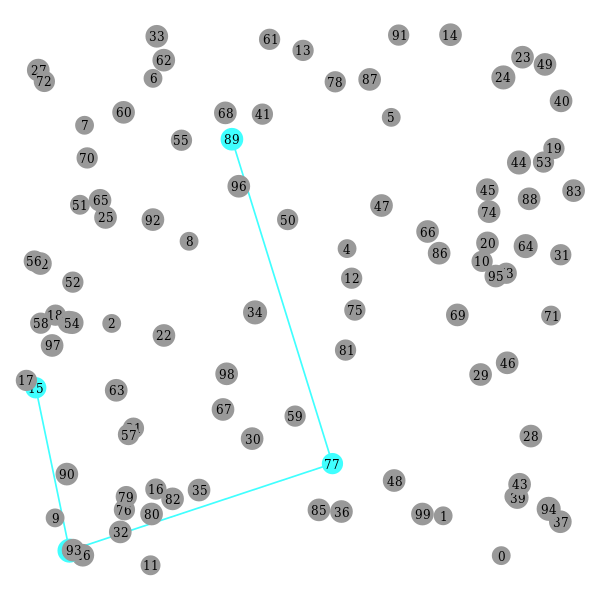

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f034c02dbe0, at 0x7f034c02d820>

In [5]:

ecolor = g.new_edge_property("vector<double>")
for e in g.edges():
    if e in E_res:
        print(e)
        ecolor[e] = blue
        print(ecolor[e])
    #else:
    #    ecolor[e] = [0.6, 0.6, 0.6, 1]


vcolor = g.new_vertex_property("vector<double>")
for v in g.vertices():
    if v in V_res:
        vcolor[v] = blue
    #elif int(v) == int(S_D_V[0]):
    #    vcolor[v] = red
    #if int(v) == int(S_D_V[1]):
    #    vcolor[v] = purple
    else:
        vcolor[v] = [0.6, 0.6, 0.6, 1]
        

graph_draw(g, pos = random_layout(g), veedge_color=ecolor, vertex_text=g.vertex_index,#name,
              vertex_color=vcolor, edge_color=ecolor, vertex_fill_color=vcolor,
              vcmap=matplotlib.cm.inferno)

True
True
True
True


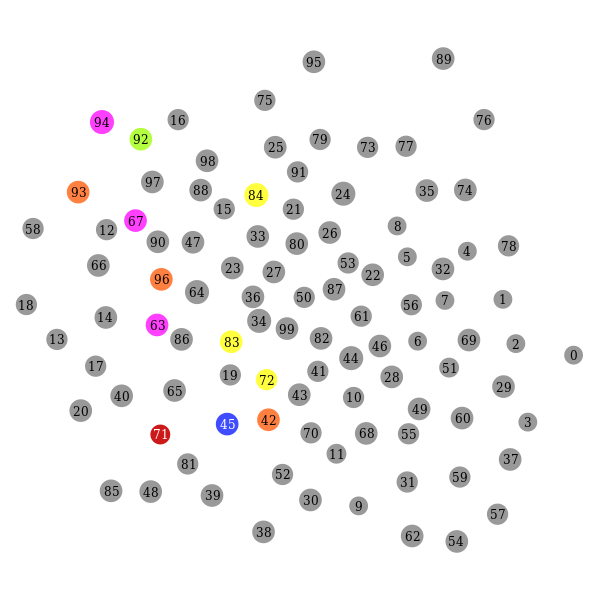

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f034c02dbe0, at 0x7f03015fcb20>

In [100]:
final = []
src = 92
des = 45

# green, blue


for path in all_shortest_paths(g, src, des):
    final.append(path)
#print(np.array(final))
   
s = set(np.array(final).flatten()) # putting all elements in set
s.discard(src)
s.discard(des)

#print(s)

vcolor = g.new_vertex_property("vector<double>")
ecolor = g.new_edge_property("vector<double>")

for i in range(len(final)):
    for v in g.vertices():
        vcolor[src] = green # src
        vcolor[des] = dark_blue # des
        if v in s:
            if v in final[i]:
                vcolor[v] = colors[i]
        else:
            vcolor[v] = [0.6, 0.6, 0.6, 1]
            

l1 = list()
l2 = list()

naive = Graph(g) # just to get the edge object 

for j in range(len(final)):
    for i in reversed(range(1, len(final[j]))):
        l1.append(naive.add_edge(final[j][i], final[j][i-1]))
    l2.append(l1)
    l1 = []
    
    
#for j in range(len(l2)):
#    for s, t, i in g.iter_edges([g.edge_index]):
#        print(g.edge(s, t))
        #if g.edge(s, t) in l2[j]:
        #    print(g.edge(s, t))
            #ecolor[g.edge(s, t)] = purple
            
    
#print(g.get_edges([g.edge_index]))

    
res = []
for e in g.edges():
    res.append(e)

#print(g.get_edges([g.edge_index]))
    
#print(l2)
for e in naive.edges():
    #if naive.edge_index
    if e in l2[0]:
        print("True")
        #    ecolor[e] = red
    #else:
    #    ecolor[e] = [0.6, 0.6, 0.6, 1]

#r = naive.edge(45, 71)
#print('r', type(r))
    
#for i in range(len(l2)):
#    for j in range(len(l2[i])):
#        ecolor[l2[i][j]] = colors[i]

#for i in range(len(l2)):
#    d = list(set(res).intersection(set(l2[i])))
#    for j in range(len(d)):
        #print(d[j].get_edges())
        #print(d[j])
#        ecolor[d[j]] = colors[i];print()
#    d = []
    
#print(d)
    
        #print(res)
        #ecolor[e] = dark_blue
        #else:
        #    ecolor[e] = [0.6, 0.6, 0.6, 1]
    
graph_draw(g, pos = sfdp_layout(g),  vertex_text=g.vertex_index,   # name,
              vertex_color=vcolor, vertex_fill_color=vcolor,
              vcmap=matplotlib.cm.inferno, veedge_color=ecolor, edge_color=ecolor)

#all shortest path

In [7]:
if type(E_res) == type(l2[0]):
    print("True")

True


In [ ]:
from functools import reduce

m = reduce(lambda x,y: x+y,l2)
print(m)

In [ ]:
if type(m) == type(E_res):
    print("True")